In [1]:
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(data.table))


Warning message:
“package ‘ggplot2’ was built under R version 3.6.2”Warning message:
“package ‘tibble’ was built under R version 3.6.3”Warning message:
“package ‘tidyr’ was built under R version 3.6.2”Warning message:
“package ‘dplyr’ was built under R version 3.6.2”Warning message:
“package ‘forcats’ was built under R version 3.6.2”

In [2]:
source('srrr-plot_functinos.R')


Warning message:
“package ‘Matrix’ was built under R version 3.6.2”

In [3]:
in_f_prefix <- '/oak/stanford/groups/mrivas/projects/biobank-methods-dev/srrr-biplot/biomarkers_unweightedresults_rank_35'


In [4]:
d_df <- fread(sprintf('%s.D.tsv', in_f_prefix)) %>% rename('names'='#names')
u_df <- fread(sprintf('%s.U.tsv', in_f_prefix)) %>% rename('names'='#names')
v_df <- fread(sprintf('%s.V.tsv', in_f_prefix)) %>% rename('names'='#names')


In [5]:
r <- nrow(d_df)
u <- u_df %>% column_to_rownames('names') %>% as.matrix()
v <- v_df %>% column_to_rownames('names') %>% as.matrix()
d <- d_df %>% pull(eigen_v) %>% diag()
ud <- u %*% d
vd <- v %*% d
phe_labels <- u_df %>% 
mutate(
    names = str_replace_all(names, '_adjstatins$', ''),
    names = str_replace_all(names, '_', ' '),
) %>% pull(names)
var_labels <- v_df %>%
mutate(names = str_replace_all(names, '_[ACGT]$', '')) %>% pull(names)
colnames(ud) <- paste0('PC', 1:r)
colnames(vd) <- paste0('PC', 1:r)
colnames(u)  <- paste0('PC', 1:r)
colnames(v)  <- paste0('PC', 1:r)
rownames(ud) <- phe_labels
rownames(vd) <- var_labels
rownames(u)  <- phe_labels
rownames(v)  <- var_labels


In [6]:
PC_x <- 'PC1'
PC_y <- 'PC2'
n_labels <- 5
# color_vd <- 'blue'
# color_u  <- 'red'

In [7]:
df_ud <- ud %>% mat_to_df(PC_x, PC_y, n_labels)
df_u  <- u  %>% mat_to_df(PC_x, PC_y, n_labels)
df_vd <- vd %>% mat_to_df(PC_x, PC_y, n_labels)


Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(PC_x)` instead of `PC_x` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.
Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(PC_y)` instead of `PC_y` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.


In [8]:
p1 <- pca_plot(df_ud, 'PC1', 'PC2')
p2 <- biplot(df_vd, df_u, PC_x, PC_y)

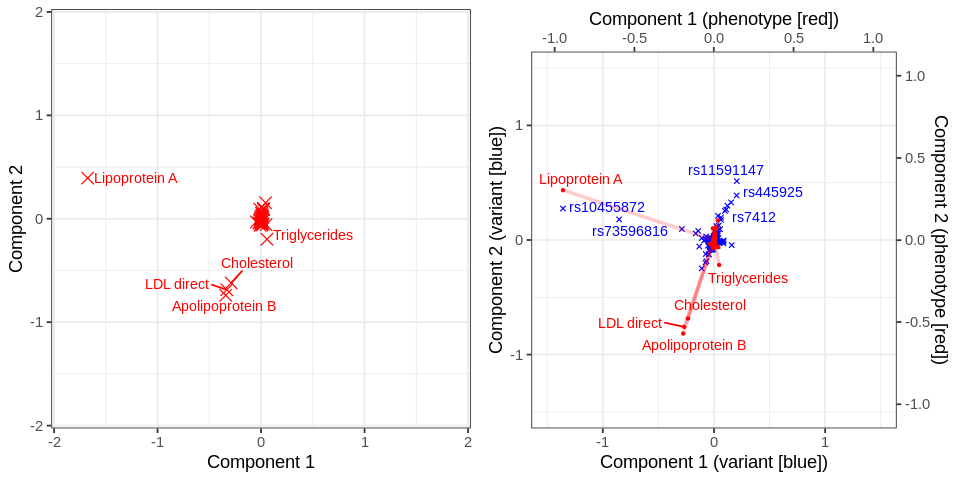

In [9]:
options(repr.plot.width=8, repr.plot.height=4)
gridExtra::grid.arrange(p1, p2, ncol=2)


In [10]:
biplot_wrapper <- function(u, vd, PC_x, PC_y, n_labels=5){
    df_u  <- u  %>% mat_to_df(PC_x, PC_y, n_labels)
    df_vd <- vd %>% mat_to_df(PC_x, PC_y, n_labels)
    biplot(df_vd, df_u, PC_x, PC_y)
}

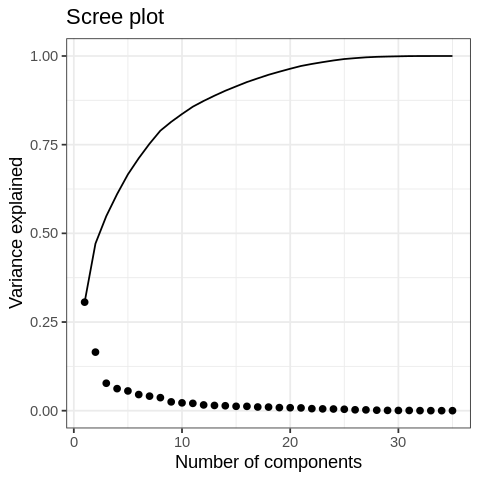

In [11]:
options(repr.plot.width=4, repr.plot.height=4)
data.frame(
    n_components = 1:r,
    var_explained = (d_df %>% pull(eigen_v)) ** 2 / sum((d_df %>% pull(eigen_v)) ** 2)
) %>%
ggplot(aes(x=n_components, y=var_explained))+
geom_point() + 
layer(
    mapping=aes(x=n_components, y=cumsum(var_explained)),
    geom='line', stat = "identity", position = "identity"
#     params=list(size=1, color=color_vd)
)+
theme_bw() + 
labs(
    title='Scree plot',
    x = 'Number of components',
    y = 'Variance explained'
)

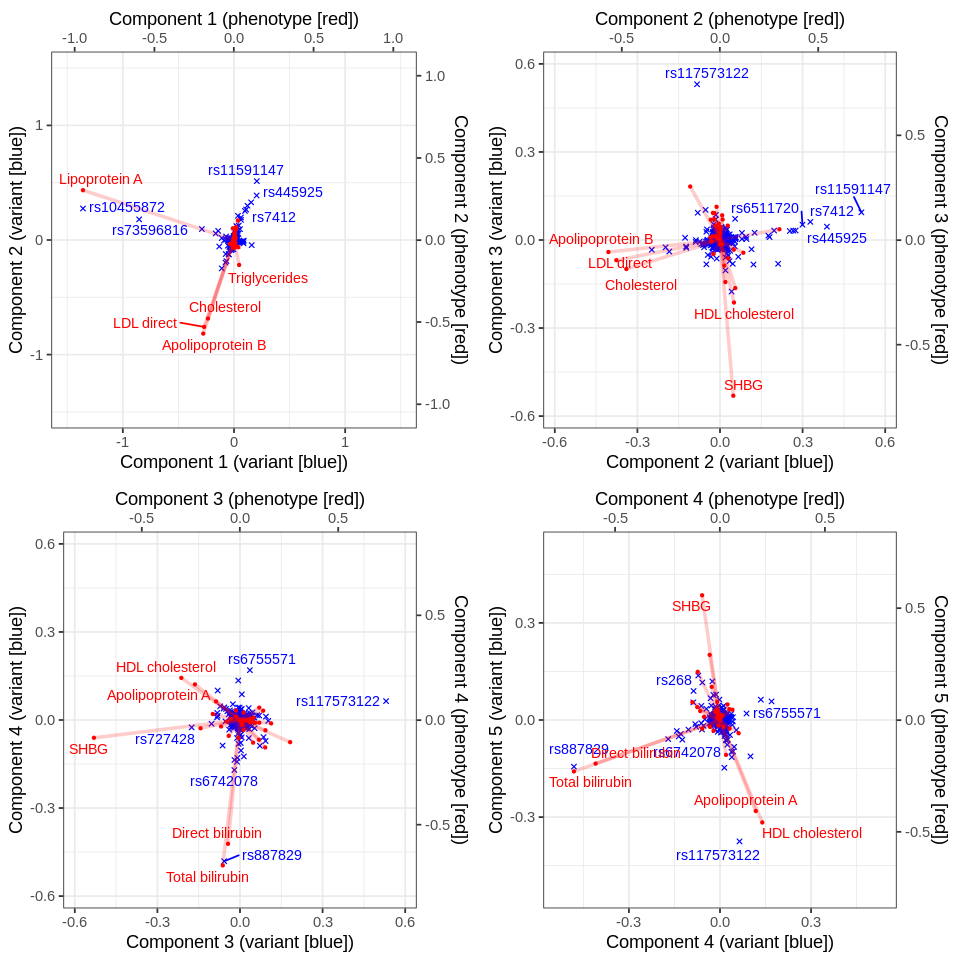

In [12]:
options(repr.plot.width=8, repr.plot.height=8)
gridExtra::grid.arrange(
    biplot_wrapper(u, vd, 'PC1', 'PC2'),
    biplot_wrapper(u, vd, 'PC2', 'PC3'),
    biplot_wrapper(u, vd, 'PC3', 'PC4'),
    biplot_wrapper(u, vd, 'PC4', 'PC5'),
    ncol=2
)


In [13]:
row.names(ud)

[1] "Alanine aminotransferase"   "Albumin"                   
 [3] "Alkaline phosphatase"       "Apolipoprotein A"          
 [5] "Apolipoprotein B"           "Aspartate aminotransferase"
 [7] "Calcium"                    "Cholesterol"               
 [9] "C reactive protein"         "Creatinine"                
[11] "Cystatin C"                 "Direct bilirubin"          
[13] "Gamma glutamyltransferase"  "Glucose"                   
[15] "Glycated haemoglobin HbA1c" "HDL cholesterol"           
[17] "IGF 1"                      "LDL direct"                
[19] "Lipoprotein A"              "Phosphate"                 
[21] "SHBG"                       "Testosterone"              
[23] "Total bilirubin"            "Total protein"             
[25] "Triglycerides"              "Urate"                     
[27] "Urea"                       "Vitamin D"                 
[29] "Creatinine in urine"        "eGFR"                      
[31] "Microalbumin in urine"      "Potassium in urine"        
[33] "Sodium in urine"            "Non albumin protein"       
[35] "AST ALT ratio"

## example1: Alanine aminotransferase (ALT)
### select components with DeGAs trait squared cosine score

In [14]:
top5 <- ud %>% cos2_phe('Alanine aminotransferase') %>% head(5)

In [15]:
top5

PC8        PC9        PC6        PC3        PC4 
0.22346022 0.20553380 0.15018218 0.09561786 0.08018699

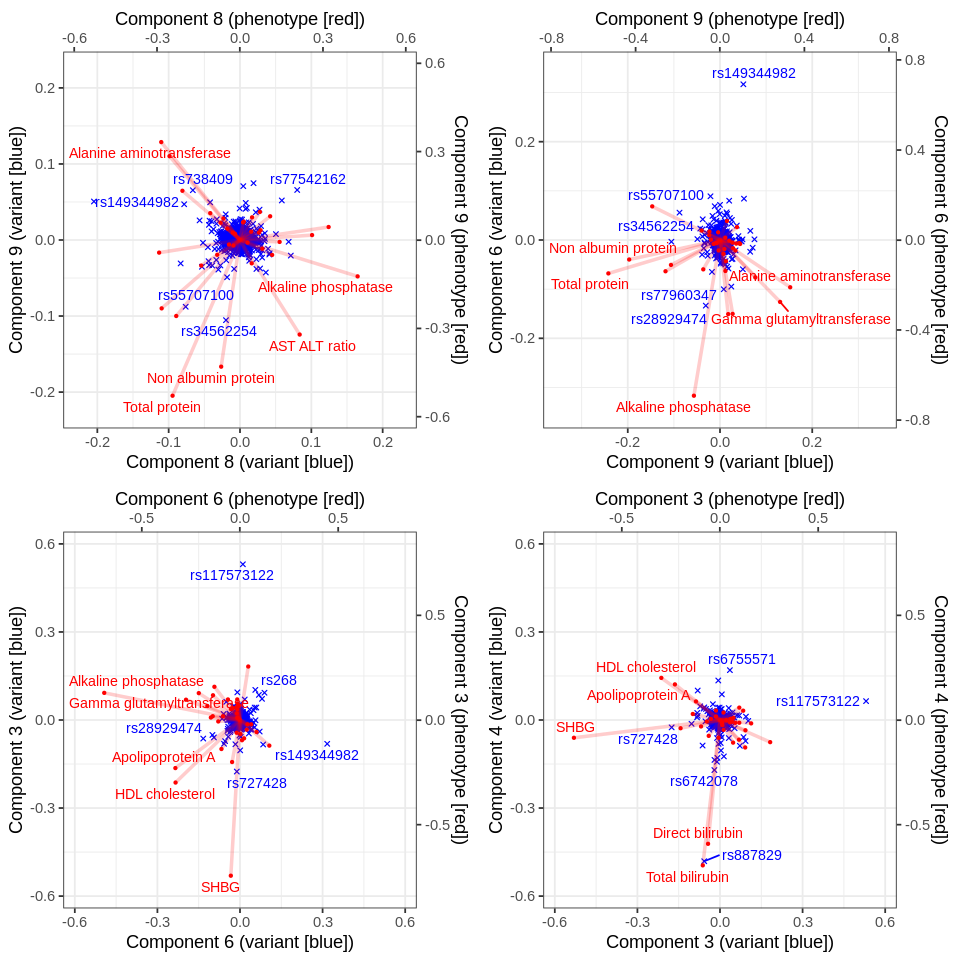

In [16]:
options(repr.plot.width=8, repr.plot.height=8)
gridExtra::grid.arrange(
    biplot_wrapper(u, vd, names(top5)[1], names(top5)[2]),
    biplot_wrapper(u, vd, names(top5)[2], names(top5)[3]),
    biplot_wrapper(u, vd, names(top5)[3], names(top5)[4]),
    biplot_wrapper(u, vd, names(top5)[4], names(top5)[5]),
    ncol=2
)


## example2: Aspartate aminotransferase (AST)
### select components with DeGAs trait squared cosine score

In [17]:
top5 <- ud %>% cos2_phe('Aspartate aminotransferase') %>% head(5)

In [18]:
top5

PC19        PC8       PC12        PC6       PC20 
0.13530394 0.13055753 0.11878521 0.10279029 0.09611067

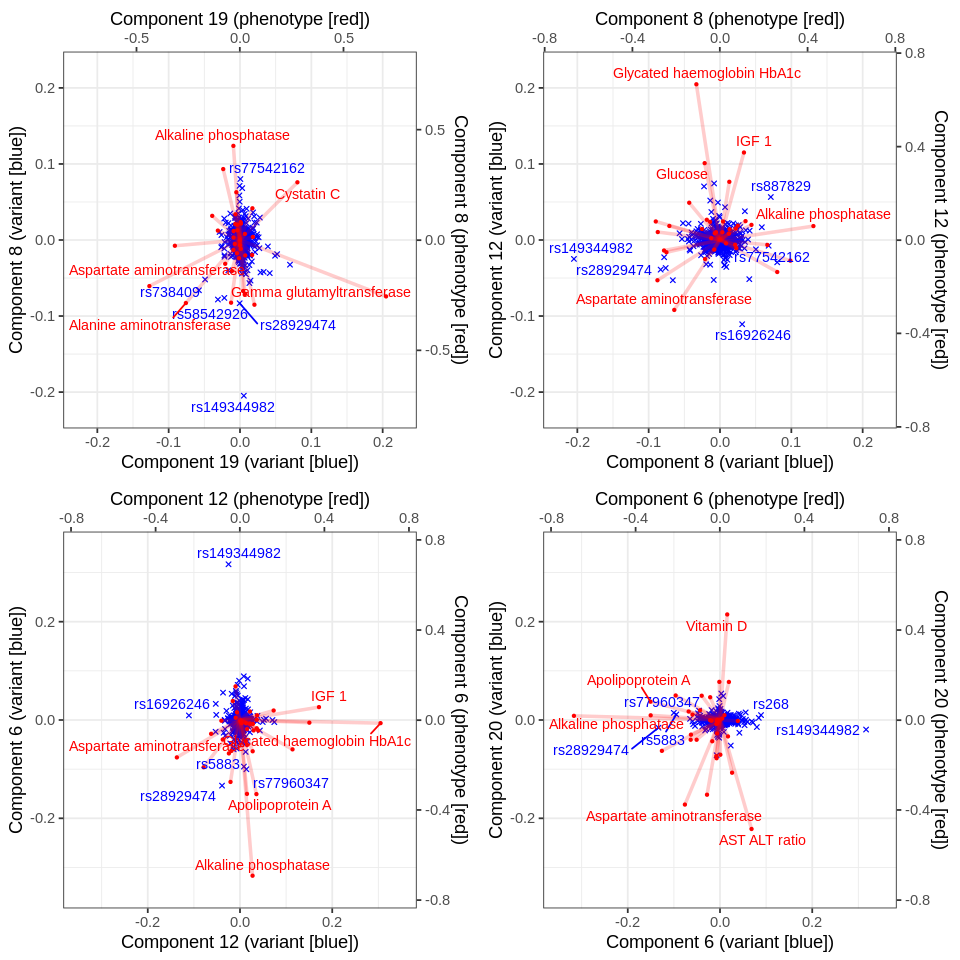

In [19]:
options(repr.plot.width=8, repr.plot.height=8)
gridExtra::grid.arrange(
    biplot_wrapper(u, vd, names(top5)[1], names(top5)[2]),
    biplot_wrapper(u, vd, names(top5)[2], names(top5)[3]),
    biplot_wrapper(u, vd, names(top5)[3], names(top5)[4]),
    biplot_wrapper(u, vd, names(top5)[4], names(top5)[5]),
    ncol=2
)


## example3: Gamma glutamyltransferase (GGT)
### select components with DeGAs trait squared cosine score

In [20]:
top5 <- ud %>% cos2_phe('Gamma glutamyltransferase') %>% head(5)

In [21]:
top5

PC19        PC6        PC8        PC9       PC18 
0.25580008 0.20504372 0.14235350 0.11979415 0.07724116

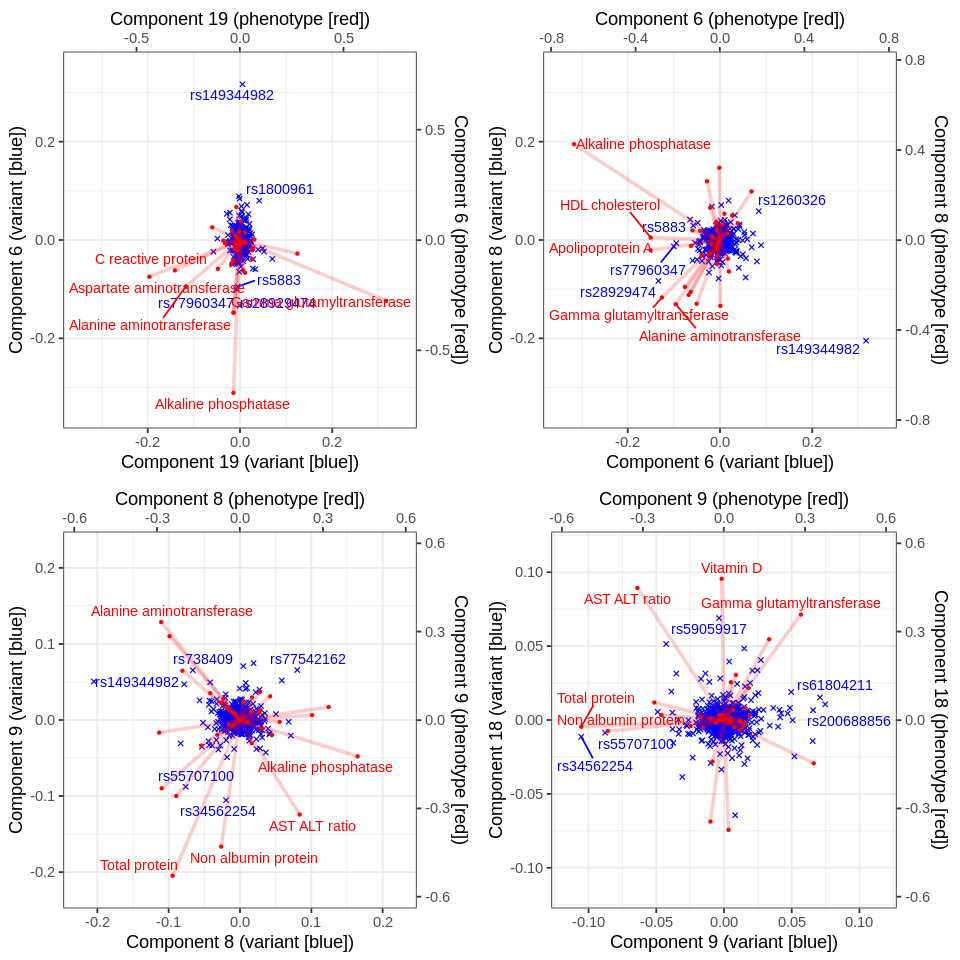

In [22]:
options(repr.plot.width=8, repr.plot.height=8)
gridExtra::grid.arrange(
    biplot_wrapper(u, vd, names(top5)[1], names(top5)[2]),
    biplot_wrapper(u, vd, names(top5)[2], names(top5)[3]),
    biplot_wrapper(u, vd, names(top5)[3], names(top5)[4]),
    biplot_wrapper(u, vd, names(top5)[4], names(top5)[5]),
    ncol=2
)


## example4: Albumin
### select components with DeGAs trait squared cosine score

In [23]:
top5 <- ud %>% cos2_phe('Albumin') %>% head(5)

In [24]:
top5

PC8       PC11       PC10        PC9       PC23 
0.20768639 0.18307933 0.15613080 0.09413459 0.08778551

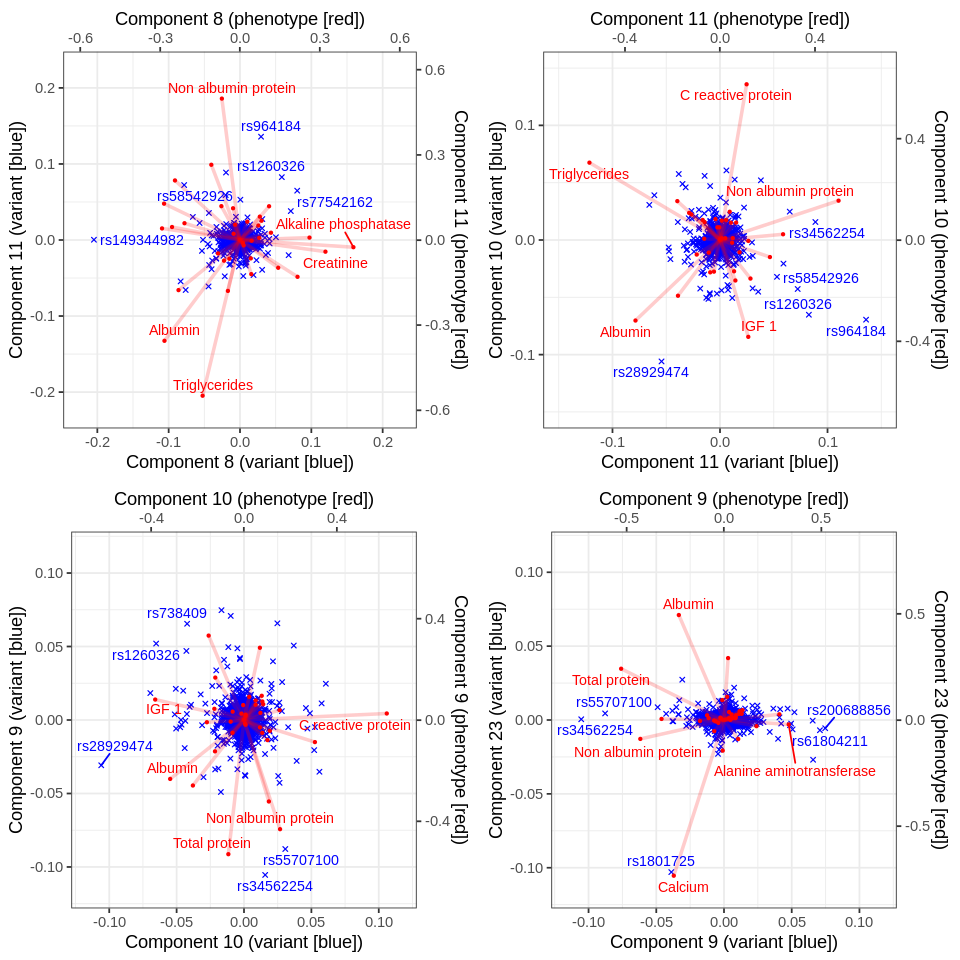

In [25]:
options(repr.plot.width=8, repr.plot.height=8)
gridExtra::grid.arrange(
    biplot_wrapper(u, vd, names(top5)[1], names(top5)[2]),
    biplot_wrapper(u, vd, names(top5)[2], names(top5)[3]),
    biplot_wrapper(u, vd, names(top5)[3], names(top5)[4]),
    biplot_wrapper(u, vd, names(top5)[4], names(top5)[5]),
    ncol=2
)


## example5: AST ALT ratio
### select components with DeGAs trait squared cosine score

In [26]:
top5 <- ud %>% cos2_phe('AST ALT ratio') %>% head(5)

In [27]:
top5

PC9       PC18       PC20        PC8        PC3 
0.20262831 0.16102610 0.15437741 0.13557293 0.09199192

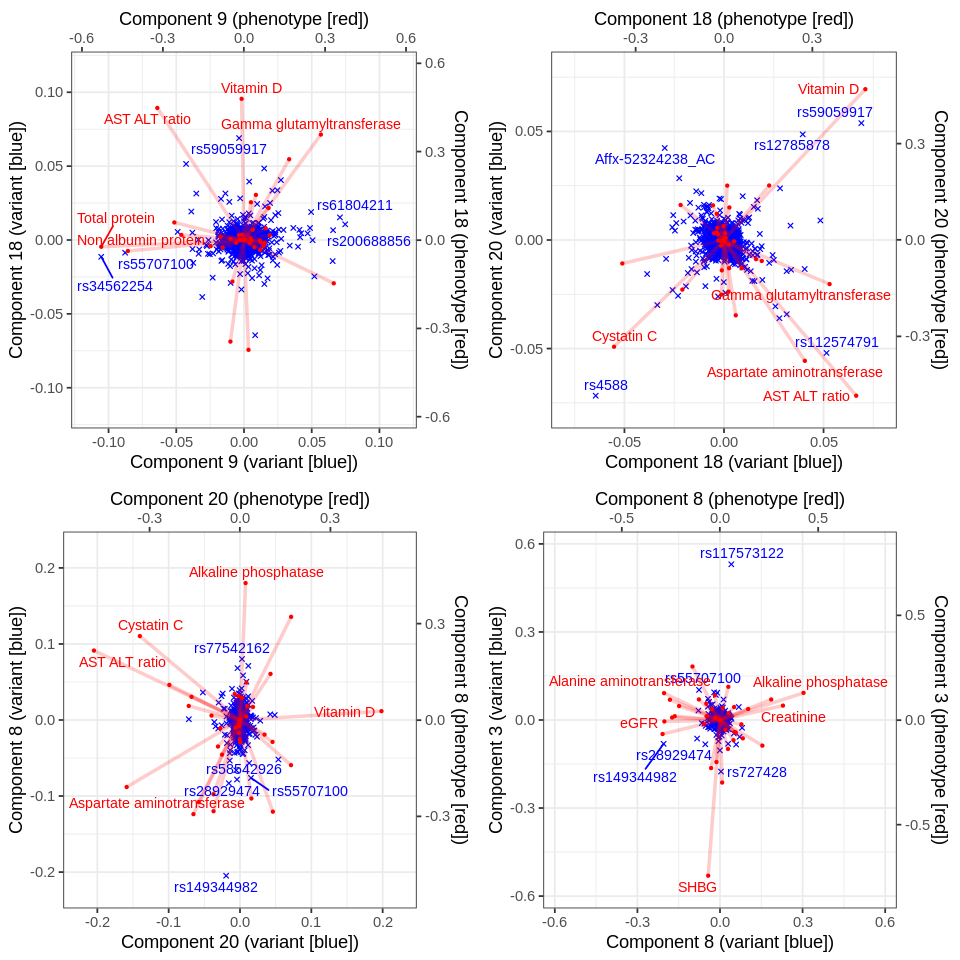

In [28]:
options(repr.plot.width=8, repr.plot.height=8)
gridExtra::grid.arrange(
    biplot_wrapper(u, vd, names(top5)[1], names(top5)[2]),
    biplot_wrapper(u, vd, names(top5)[2], names(top5)[3]),
    biplot_wrapper(u, vd, names(top5)[3], names(top5)[4]),
    biplot_wrapper(u, vd, names(top5)[4], names(top5)[5]),
    ncol=2
)


**Figure.** The latent structures of the the top five key DeGAs-SRRR components for AST ALT ratio. Using DeGAs trait squared cosine score, the top five key DeGAs-SRRR components are identified from a full-rank SVD of coefficient matrix C from SRRR (C = UDV^{T}) and shown as a series of biplots. In each panel, principal components of genetic variants (rows of UD) are shown in blue as scatter plot using the main axis and singular vectors of traits (rows of V) are shown in red dots with lines using the seconday axis, for the identified key components. The five traits and variants with the largest distance from the center of origin are annotated with their name.



In [30]:
g <- gridExtra::arrangeGrob(
    biplot_wrapper(u, vd, names(top5)[1], names(top5)[2]),
    biplot_wrapper(u, vd, names(top5)[2], names(top5)[3]),
    biplot_wrapper(u, vd, names(top5)[3], names(top5)[4]),
    biplot_wrapper(u, vd, names(top5)[4], names(top5)[5]),
    ncol=2
)


In [32]:
ggsave('data/biomarkers_unweightedresults_rank_35.AST_ALT_ratio.png', g, width=8, height=8)


In [33]:
ggsave('data/biomarkers_unweightedresults_rank_35.AST_ALT_ratio.pdf', g, width=8, height=8)
